In [14]:
import pandas as pd
from pathlib import Path
import numpy as np
import seaborn as sns
sns.set_style("whitegrid")
import matplotlib
import matplotlib.pyplot as plt
import matplotlib.cm as mplcm

import matplotlib.colors as colors


plt.rc('text', usetex=True)
plt.rc('font', family='serif')
plt.rc('xtick', labelsize=15)
plt.rc('ytick', labelsize=15)
plt.rc('axes', labelsize=17)
plt.rc('figure', titlesize=20)

In [15]:
dude_10_path = Path("/g/g13/jones289/workspace/hd-cuda-master/hdpy/hdpy/dude_0.1_multistep_enrich.csv")
dude_20_path = Path("/g/g13/jones289/workspace/hd-cuda-master/hdpy/hdpy/dude_0.2_multistep_enrich.csv")

lit_pcba_10_path = Path("/g/g13/jones289/workspace/hd-cuda-master/hdpy/hdpy/lit-pcba_0.1_multistep_enrich.csv")
lit_pcba_20_path = Path("/g/g13/jones289/workspace/hd-cuda-master/hdpy/hdpy/lit-pcba_0.2_multistep_enrich.csv")

In [16]:
def parse_file(path):
    
    df = pd.read_csv(path, index_col=0)
    return df

In [17]:
lit_pcba_10_df = parse_file(lit_pcba_10_path)
lit_pcba_10_df

,target,enrich,p,actives_database
0,PPARG,0.000000,0.10,7
1,PPARG,0.000000,0.25,7
2,PPARG,0.000000,0.50,7
3,PPARG,0.000000,0.75,7
4,PPARG,0.000000,1.00,7
...,...,...,...,...
70,MAPK1,1.293359,0.10,77
71,MAPK1,2.074626,0.25,77
72,MAPK1,1.557947,0.50,77
73,MAPK1,1.211223,0.75,77


In [18]:
lit_pcba_20_df = parse_file(lit_pcba_20_path)
lit_pcba_20_df

,target,enrich,p,actives_database
0,PPARG,13.862434,0.10,7
1,PPARG,5.670996,0.25,7
2,PPARG,2.857143,0.50,7
3,PPARG,1.899927,0.75,7
4,PPARG,1.428571,1.00,7
...,...,...,...,...
70,MAPK1,3.243661,0.10,77
71,MAPK1,2.336920,0.25,77
72,MAPK1,1.817604,0.50,77
73,MAPK1,1.298289,0.75,77


In [19]:
dude_10_df = parse_file(dude_10_path)
dude_10_df[dude_10_df['actives_database'] == dude_10_df['actives_database'].max()]

,target,enrich,p,actives_database
150,src,47.467742,0.10,62
151,src,38.487358,0.25,62
152,src,19.564407,0.50,62
153,src,13.042938,0.75,62
154,src,9.815364,1.00,62


In [20]:
dude_20_df = parse_file(dude_20_path)
dude_20_df[dude_20_df['actives_database'] == dude_20_df['actives_database'].max()]

,target,enrich,p,actives_database
150,src,47.467742,0.10,62
151,src,19.564407,0.25,62
152,src,9.815364,0.50,62
153,src,6.550978,0.75,62
154,src,4.916014,1.00,62


In [52]:


def make_plot(df_20, df_10, cmap, title):
    
    f, ax = plt.subplots(1,2, figsize=(15,6), sharex=True, sharey=False)
    

    vmin=0
    vmax=df_20["actives_database"].unique().shape[0] - 1

    
    
    
    
    cm = plt.get_cmap(cmap)
    
    min_val, max_val = 0.3,1.0
    n = df_20["target"].unique().shape[0]
    color_list = cmap(np.linspace(min_val, max_val, n))
    
#     import pdb 
#     pdb.set_trace()
    cm = matplotlib.colors.LinearSegmentedColormap.from_list(cmap, color_list)
    
    cNorm = colors.Normalize(vmin=vmin, vmax=vmax)
    scalarMap = mplcm.ScalarMappable(norm=cNorm, cmap=cm)
    distances_normalized = df_20["actives_database"].values / (np.max(df_20["actives_database"].values)/(df_20["target"].unique().shape[0]))  # normalise lengths of lines

    i=0
    for group_name, group_df in df_20.groupby("target"):
                
        sns.lineplot(x="p", y="enrich", data=group_df, ax=ax[0],
                    color=scalarMap.to_rgba(distances_normalized[i]))
        i = i + 1
        
    vmin=0
    vmax=df_10["actives_database"].unique().shape[0] - 1
    cm = plt.get_cmap(cmap)
    cNorm = colors.Normalize(vmin=vmin, vmax=df_10["actives_database"].unique().shape[0] - 1)
    scalarMap = mplcm.ScalarMappable(norm=cNorm, cmap=cm)
    distances_normalized = df_10["actives_database"].values / (np.max(df_10["actives_database"].values)/(df_10["target"].unique().shape[0]))  # normalise lengths of lines

    i=0
    for group_name, group_df in df_10.groupby("target"):
        
        
        sns.lineplot(x="p", y="enrich", data=group_df, ax=ax[1],
                    color=scalarMap.to_rgba(distances_normalized[i]), label=group_name)
        i = i + 1

    
    
    
    
#     labels_0 = [float(x.get_text()) *  for x in ax[0].get_xticklabels()]
#     ax[0].set_xticklabels(labels_0)
#     ax[0].get_legend().remove()
    ax[1].get_legend().remove()
    ax[0].set_ylabel("EF")
    ax[0].set_xlabel("")
    ax[1].set_xlabel("")
#     plt.tight_layout()
    plt.legend()
    f.suptitle(title)
    return f, ax

In [53]:
green_color_pal = sns.color_palette("Greens", 20)
green_color_pal

[(0.9420530565167243, 0.9779008073817763, 0.9297808535178778),
 (0.9154786620530565, 0.9675663206459054, 0.8987773933102653),
 (0.8828143021914648, 0.9546943483275664, 0.8621914648212226),
 (0.8385236447520185, 0.9369780853517877, 0.8149480968858132),
 (0.7942329873125721, 0.9192618223760092, 0.7677047289504036),
 (0.7371472510572856, 0.895517108804306, 0.7108342945021145),
 (0.681045751633987, 0.8718954248366013, 0.6562091503267974),
 (0.623760092272203, 0.8474279123414071, 0.6015840061514801),
 (0.5573241061130334, 0.8164244521337947, 0.546958861976163),
 (0.4908881199538639, 0.7854209919261823, 0.49233371780084584),
 (0.41411764705882353, 0.748635140330642, 0.4427527873894656),
 (0.3388235294117647, 0.7117262591311034, 0.40584390618992694),
 (0.26352941176470585, 0.6748173779315647, 0.36893502499038827),
 (0.21568627450980393, 0.6287581699346405, 0.3333333333333333),
 (0.17139561707035755, 0.581514801999231, 0.2979008073817762),
 (0.12110726643598617, 0.5312572087658592, 0.2590542099192618),
 (0.06943483275663206, 0.48696655132641287, 0.22214532871972317),
 (0.017762399077277974, 0.44267589388696654, 0.18523644752018453),
 (0.0, 0.3877277970011534, 0.156078431372549),
 (0.0, 0.32719723183391003, 0.13098039215686275)]

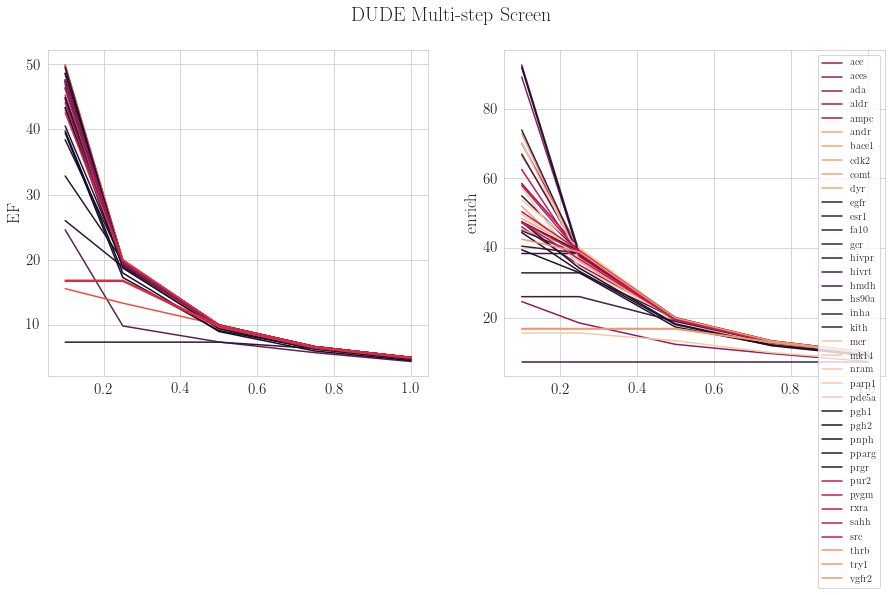

In [54]:
# make_plot(df_20=dude_20_df, df_10=dude_10_df, cmap="winter")
make_plot(df_20=dude_20_df, df_10=dude_10_df, cmap=sns.color_palette("rocket_r", as_cmap=True),
         title="DUDE Multi-step Screen")
# make_plot(df_20=dude_20_df, df_10=dude_10_df, cmap="flare")
plt.savefig("dude_multistep_screen.png", dpi=600)

/usr/workspace/wsa/jones289/miniconda3/envs/HD_env/lib/python3.8/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='actives_database', ylabel='Density'>

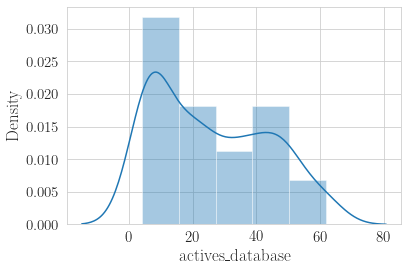

In [55]:
sns.distplot(dude_10_df["actives_database"])

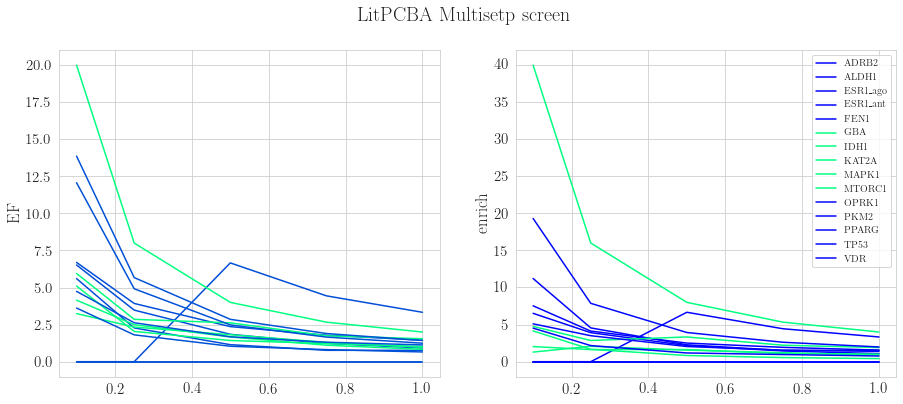

In [57]:
# make_plot(df_20=lit_pcba_20_df, df_10=lit_pcba_10_df, cmap="flare")
make_plot(df_20=lit_pcba_20_df, df_10=lit_pcba_10_df, cmap=sns.color_palette("winter", as_cmap=True),
         title="LitPCBA Multisetp screen")
plt.savefig("lit_pcba_multistep_screen.png", dpi=600)